<a href="https://colab.research.google.com/github/Natural-Language-Processing-YU/Exercises/blob/main/M7_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import matplotlib.pyplot as plt


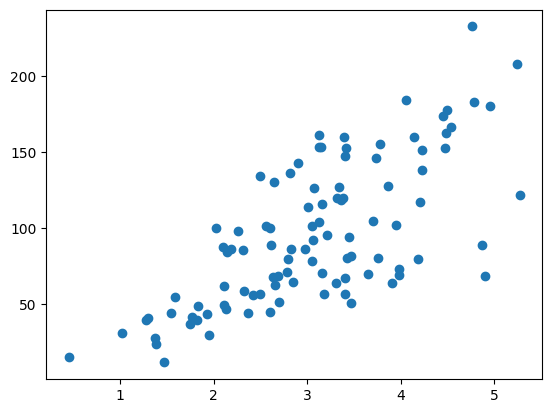

In [71]:
np.random.seed(0)

# Generate 'hours of studying' data
hours_studying = np.random.normal(3.0, 1.0, 100)

# Generate 'grades' data
grades = hours_studying * np.random.normal(30.0, 10.0, 100)

# Plot the data
plt.scatter(hours_studying, grades)
plt.show()


 The cost function that we're going to use is the sum of squared residuals (SSR). SSR is the sum of the squared differences between the actual and predicted values.

Mathematically, it is represented as:

$$
J(m, b) = \frac{1}{N}\sum_{i=1}^{N}(y_i - (mx_i + b))^2
$$

Here, $y_i$ is the actual value, $mx_i + b$ is the predicted value, and $N$ is the total number of observations.


In [72]:
def compute_cost(m, b, X, Y):
    total_cost = 0
    N = len(X)

    for i in range(N):
        x = X[i]
        y = Y[i]
        total_cost += (y - (m*x + b))**2

    return total_cost/N


In [73]:
def gradient_descent(m_current, b_current, X, Y, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(X))

    for i in range(len(X)):
        x = X[i]
        y = Y[i]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))

    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    return m_updated, b_updated


In [74]:
m = 0
b = 0
learning_rate = 0.0001


In [75]:
import os
import imageio

num_iterations = 1000
m, b = 0, 0  # Initial parameters
images = []  # List to store images

for i in range(num_iterations):
    m, b = gradient_descent(m, b, hours_studying, grades, learning_rate)
    if i % 100 == 0:
        print(f"Iteration {i}: m = {m}, b = {b}, cost = {compute_cost(m, b, hours_studying, grades)}")

        fig = plt.figure()
        plt.scatter(hours_studying, grades)
        pred = m * hours_studying + b
        plt.plot(hours_studying, pred, color='red')
        plt.title(f'Line of best fit at iteration {i}')

        # Save the figure to a file
        filename = f'plot_{i}.png'
        fig.savefig(filename)
        plt.close(fig)  # Close the figure

        # Append the image to the images list
        images.append(imageio.imread(filename))

# Save the images as an animated gif
imageio.mimsave('animated_gradient_descent.gif', images)

# Remove the image files
for filename in os.listdir(os.getcwd()):
    if filename.startswith('plot_') and filename.endswith('.png'):
        os.remove(filename)


Iteration 0: m = 0.06517566793447085, b = 0.01909376342770831, cost = 11281.394012714622
Iteration 100: m = 5.892926052363878, b = 1.7233397581649523, cost = 7583.180916738321


<ipython-input-75-d9df5272d0f3>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Iteration 200: m = 10.543320035766437, b = 3.0774830295625764, cost = 5229.876196024568
Iteration 300: m = 14.254531882150461, b = 4.152358336021616, cost = 3732.3745810320015
Iteration 400: m = 17.216553628194504, b = 5.004470672314359, cost = 2779.4446391362326
Iteration 500: m = 19.58094226262968, b = 5.678894155459138, cost = 2173.041060362577
Iteration 600: m = 21.46859506846828, b = 6.211584471108526, cost = 1787.1420463589986
Iteration 700: m = 22.975952027247953, b = 6.631223516122039, cost = 1541.5563838759301
Iteration 800: m = 24.179943487864712, b = 6.960690873208114, cost = 1385.25614931107
Iteration 900: m = 25.141936930749754, b = 7.2182376088478515, cost = 1285.7708400762792


Gradient descent is an optimization algorithm that's used to minimize the cost function. It does this by iteratively moving in the direction of steepest descent, defined by the negative of the gradient.

The gradients for $m$ and $b$ are calculated as:

$$
\frac{dJ}{dm} = - \frac{2}{N} \sum_{i=1}^{N} x_i(y_i - (mx_i + b))
$$

$$
\frac{dJ}{db} = - \frac{2}{N} \sum_{i=1}^{N} (y_i - (mx_i + b))
$$

We update $m$ and $b$ using a learning rate ($\alpha$) as follows:

$$
m_{\text{new}} = m_{\text{current}} - \alpha * \frac{dJ}{dm}
$$

$$
b_{\text{new}} = b_{\text{current}} - \alpha * \frac{dJ}{db}
$$


In [76]:
import os
import imageio

num_iterations = 1000
m, b = 0, 0  # Initial parameters
images = []  # List to store images

for i in range(num_iterations):
    m, b = gradient_descent(m, b, hours_studying, grades, learning_rate)
    if i % 100 == 0:
        print(f"Iteration {i}: m = {m}, b = {b}, cost = {compute_cost(m, b, hours_studying, grades)}")

        fig = plt.figure()
        plt.scatter(hours_studying, grades)
        pred = m * hours_studying + b
        plt.plot(hours_studying, pred, color='red')
        plt.title(f'Line of best fit at iteration {i}')

        # Save the figure to a file
        filename = f'plot_{i}.png'
        fig.savefig(filename)
        plt.close(fig)  # Close the figure

        # Append the image to the images list
        images.append(imageio.imread(filename))
# Number of extra frames to append
pause_frames = 10

# Append the last frame multiple times
for _ in range(pause_frames):
    images.append(images[-1])

# Save the images as an animated gif
imageio.mimsave('animated_gradient_descent.gif', images, duration=0.25)

# Remove the image files
for filename in os.listdir(os.getcwd()):
    if filename.startswith('plot_') and filename.endswith('.png'):
        os.remove(filename)


Iteration 0: m = 0.06517566793447085, b = 0.01909376342770831, cost = 11281.394012714622
Iteration 100: m = 5.892926052363878, b = 1.7233397581649523, cost = 7583.180916738321


<ipython-input-76-759eb197734f>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Iteration 200: m = 10.543320035766437, b = 3.0774830295625764, cost = 5229.876196024568
Iteration 300: m = 14.254531882150461, b = 4.152358336021616, cost = 3732.3745810320015
Iteration 400: m = 17.216553628194504, b = 5.004470672314359, cost = 2779.4446391362326
Iteration 500: m = 19.58094226262968, b = 5.678894155459138, cost = 2173.041060362577
Iteration 600: m = 21.46859506846828, b = 6.211584471108526, cost = 1787.1420463589986
Iteration 700: m = 22.975952027247953, b = 6.631223516122039, cost = 1541.5563838759301
Iteration 800: m = 24.179943487864712, b = 6.960690873208114, cost = 1385.25614931107
Iteration 900: m = 25.141936930749754, b = 7.2182376088478515, cost = 1285.7708400762792


#Show output

/content/gradient_descent.gif: Scheme missing.


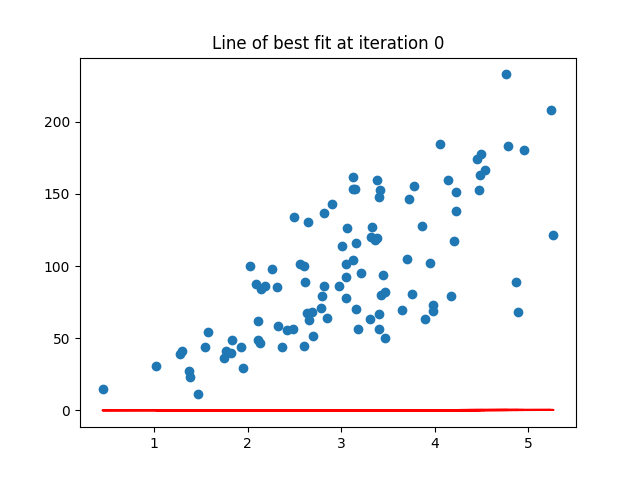

In [77]:
from IPython.display import Image
!wget /content/gradient_descent.gif
Image(open('animated_gradient_descent.gif','rb').read())

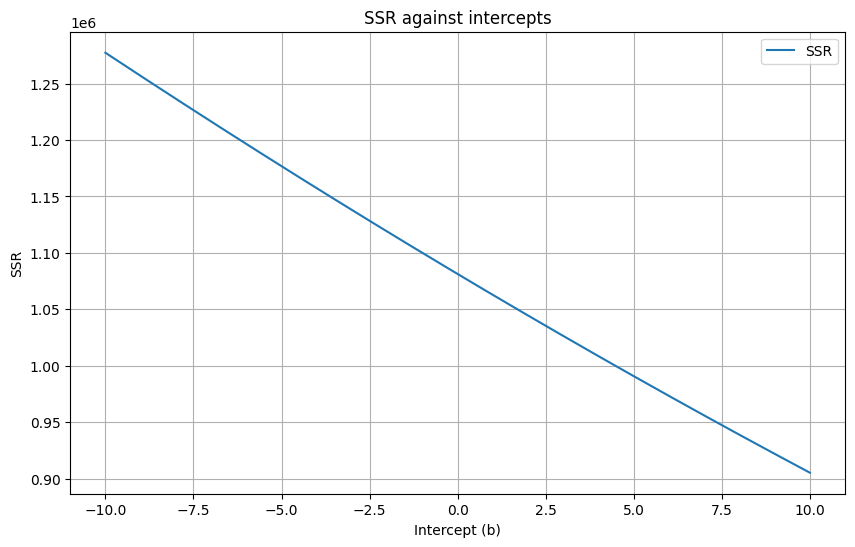

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Let's use some arbitrary slope, m
m = 0.8

# Define a range of intercepts (b)
b_values = np.linspace(-10, 10, 400)

# Initialize an array to store the corresponding SSR values
SSR_values = np.zeros(b_values.shape)

# For each value of b, compute the SSR
for i, b in enumerate(b_values):
    residuals = grades - (m * hours_studying + b)
    SSR = np.sum(residuals**2)
    SSR_values[i] = SSR

# Plot the SSR values against the corresponding b values
plt.figure(figsize=(10, 6))
plt.plot(b_values, SSR_values, label='SSR')
plt.title('SSR against intercepts')
plt.xlabel('Intercept (b)')
plt.ylabel('SSR')
plt.legend()
plt.grid(True)
plt.show()
